# B-scan from a water pocket (2D)

INtro needed here

In [1]:
#import
from math import sqrt
import os

In [2]:
#tips to force file closure: 
#os.close(n) #n is found there->  /proc/ipython_pid/fd/ ; or just try from 1 onward...

In [3]:
#You current directory:
%pwd

'C:\\Users\\christophe\\Desktop\\home\\GitHub\\gprMax\\tools\\Jupyter_notebooks'

# Waterpocket with salt

In [32]:
#paths and filenames
file="waterpocket_salt_2D" #file name
direname="../../user_models/"+file #folder path
basename=os.path.join(direname,file) #filename path (=name of the model)
fname=basename+".in" #filename path input defined bellow
outputname=basename+'_merged.out' #output path after model output had been merged in one single output file

#cretation of the sub folder un gprMax/user_model/.. if not existing already
if not os.path.isdir(direname): 
    os.makedirs(direname)

In [33]:
#note: there is a better and more robust way to define an input file: see gprMax/gprMax/input_cmd_funcs.py

In [34]:
%%writefile {fname}
#title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
#domain: 50 40 0.1
#dx_dy_dz: 0.1 0.1 0.1
#time_window: 400e-9

#material: 3.2 5e-8 1 0 ice
#material: 6 0.001 1 0 granite
#material: 80 3 1 0 salt_water


#waveform: ricker 1 25e6 my_ricker
#hertzian_dipole: z 1 30.5 0 my_ricker
#rx: 5 30.5 0
#src_steps: 1 0 0
#rx_steps: 1 0 0

#box: 0 0 0 50 30 0.1 ice
#box: 0 0 0 50 5 0.1 granite
#sphere: 25 15 0 3 salt_water


Overwriting ../../user_models/waterpocket_salt_2D\waterpocket_salt_2D.in


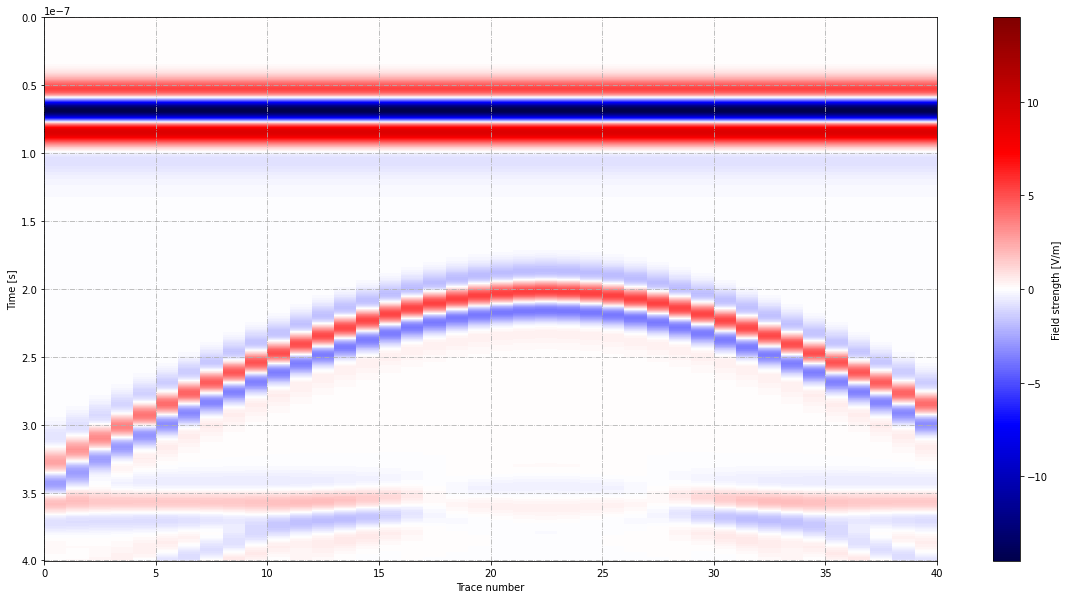

In [36]:
#%run -m gprMax ../../user_models/waterpocket_salt_2D/waterpocket_salt_2D.in -n 40
#%run -m tools.outputfiles_merge ../../user_models/waterpocket_salt_2D/waterpocket_salt_2D
%run -m tools.plot_Bscan ../../user_models/waterpocket_salt_2D/waterpocket_salt_2D_merged.out Ez

# Water pocket in contact with the bed

In [39]:
#paths and filenames
file="waterpocket_bed_2D" #file name
direname="../../user_models/"+file #folder path
basename=os.path.join(direname,file) #filename path (=name of the model)
fname=basename+".in" #filename path input defined bellow
outputname=basename+'_merged.out' #output path after model output had been merged in one single output file

#cretation of the sub folder un gprMax/user_model/.. if not existing already
if not os.path.isdir(direname): 
    os.makedirs(direname)

In [ ]:
#I wrote a usual in file with a sphere
#In the same file I wrote the line bellow to cut the sphere in half, and to save it
#geometry_objects_write: 22 15 0 28 18 0.1 half_sphere
#I wrote again a new in file with this time no sphere but the half sphere saved by using geometry_objects_read

In [56]:
%%writefile {fname}
#title: B-scan from a water pocket at bed interface buried in a snowfree ice 2D-space
#domain: 50 40 0.1
#dx_dy_dz: 0.1 0.1 0.1
#time_window: 400e-9

#material: 3.2 5e-8 1 0 ice
#material: 6 0.001 1 0 granite
#material: 80 5e-4 1 0 fresh_water


#waveform: ricker 1 25e6 my_ricker
#hertzian_dipole: z 1 30.5 0 my_ricker
#rx: 5 30.5 0
#src_steps: 1 0 0
#rx_steps: 1 0 0

#box: 0 0 0 50 30 0.1 ice
#box: 0 0 0 50 5 0.1 granite
#geometry_objects_read: 22 5 0 ../../user_models/waterpocket_bed_2D/half_sphere.h5  ../../user_models/waterpocket_bed_2D/half_sphere_materials.txt

#python:
from gprMax.input_cmd_funcs import *
for i in range(1, 40):
    snapshot(0, 0, 0, 50, 40, 0.1, 0.1, 0.1, 0.1, i*10e-9, 'snapshot' + str(i))
#end_python:

#geometry_view: 0 0 0 50 40 0.1 0.1 0.1 0.1 waterpocket_bed n


Overwriting ../../user_models/waterpocket_bed_2D\waterpocket_bed_2D.in


In [4]:
#%run -m gprMax ../../user_models/waterpocket_bed_2D/waterpocket_bed_2D.in -n 40
#%run -m tools.outputfiles_merge ../../user_models/waterpocket_bed_2D/waterpocket_bed_2D
#%run -m tools.plot_Bscan ../../user_models/waterpocket_bed_2D/waterpocket_bed_2D_merged.out Ez

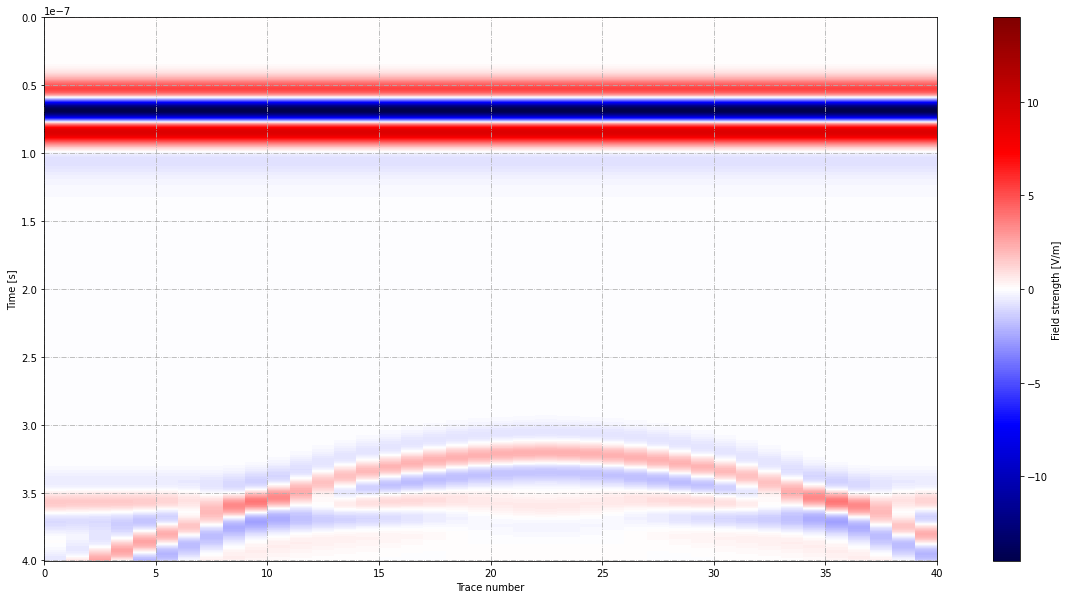

In [5]:
%run -m tools.plot_Bscan ../../user_models/waterpocket_bed_2D/waterpocket_bed_2D_merged.out Ez

## Implementation of a realistic bedrock shape

In [ ]:
#METHOD
#create a object on inkscape: change the png size (pixel) to match your model space. Save as PNG
# python -m tools.convert_png2h5 user_models/waterpocket_realbed_2D/bed.png 0.1 0.1 0.1 -zcells 1
#write a material.txt associated to the .h5 created above
#geometry_objects_read: .....

In [25]:
#paths and filenames
file="waterpocket_realbed_2D" #file name
direname="../../user_models/"+file #folder path
basename=os.path.join(direname,file) #filename path (=name of the model)
fname=basename+".in" #filename path input defined bellow
outputname=basename+'_merged.out' #output path after model output had been merged in one single output file

#cretation of the sub folder un gprMax/user_model/.. if not existing already
if not os.path.isdir(direname): 
    os.makedirs(direname)

In [32]:
%%writefile {fname}
#title: B-scan from a water pocket at bed interface buried in a snowfree ice 2D-space
#domain: 50 40 0.1
#dx_dy_dz: 0.1 0.1 0.1
#time_window: 400e-9

#material: 3.2 5e-8 1 0 ice
#material: 6 0.001 1 0 granite
#material: 80 5e-4 1 0 fresh_water


#waveform: ricker 1 25e6 my_ricker
#hertzian_dipole: z 1 30.5 0 my_ricker
#rx: 5 30.5 0
#src_steps: 1 0 0
#rx_steps: 1 0 0

#box: 0 0 0 50 30 0.1 ice
#sphere: 25 2 0 3 fresh_water
#geometry_objects_read: 0 0 0 ../../user_models/waterpocket_realbed_2D/bed.h5  ../../user_models/waterpocket_realbed_2D/bed_materials.txt

#geometry_view: 0 0 0 50 40 0.1 0.1 0.1 0.1 waterpocket_realbed n

In [33]:
#%run -m gprMax ../../user_models/waterpocket_realbed_2D/waterpocket_realbed_2D.in -n 1 --geometry-only

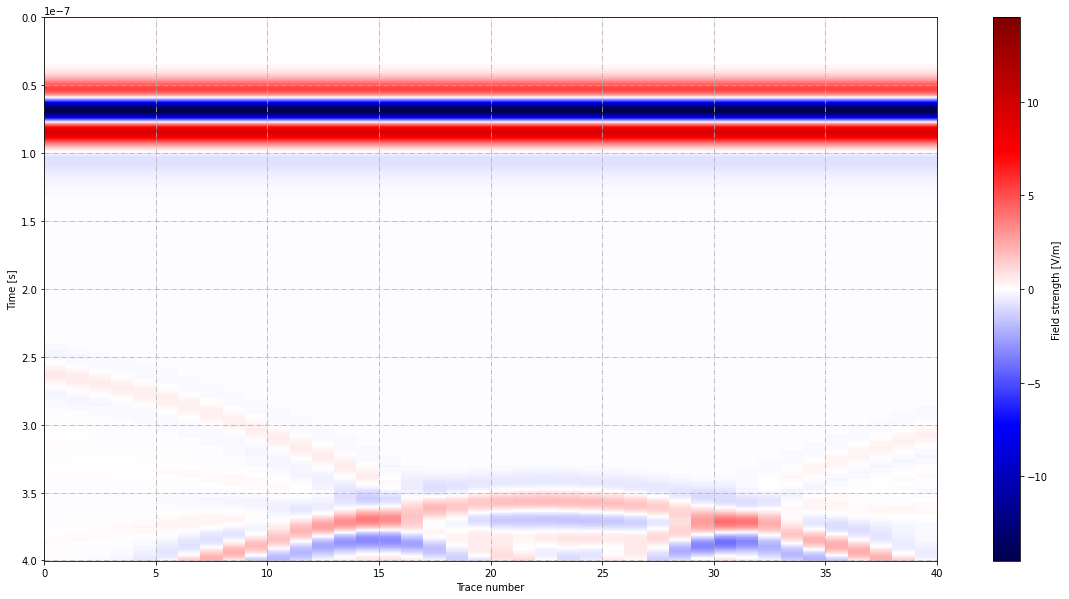

In [35]:
#%run -m gprMax ../../user_models/waterpocket_realbed_2D/waterpocket_realbed_2D.in -n 40
#%run -m tools.outputfiles_merge ../../user_models/waterpocket_realbed_2D/waterpocket_realbed_2D
%run -m tools.plot_Bscan ../../user_models/waterpocket_realbed_2D/waterpocket_realbed_2D_merged.out Ez

# Water pocket in contact with the bed with snow layer

In [6]:
#paths and filenames
file="waterpocket_bed_snow_2D" #file name
direname="../../user_models/"+file #folder path
basename=os.path.join(direname,file) #filename path (=name of the model)
fname=basename+".in" #filename path input defined bellow
outputname=basename+'_merged.out' #output path after model output had been merged in one single output file

#cretation of the sub folder un gprMax/user_model/.. if not existing already
if not os.path.isdir(direname): 
    os.makedirs(direname)

In [7]:
%%writefile {fname}
#title: B-scan from a water pocket at bed interface buried in a snowcovered ice 2D-space
#domain: 50 40 0.1
#dx_dy_dz: 0.1 0.1 0.1
#time_window: 500e-9

#material: 3.2 5e-8 1 0 ice
#material: 6 0.001 1 0 granite
#material: 80 5e-4 1 0 fresh_water
#material: 50 1e-6 1 0 wet_snow



#waveform: ricker 1 25e6 my_ricker
#hertzian_dipole: z 1 32.5 0 my_ricker
#rx: 5 32.5 0
#src_steps: 1 0 0
#rx_steps: 1 0 0

#box: 0 0 0 50 30 0.1 ice
#box: 0 0 0 50 5 0.1 granite
#box: 0 30 0 50 32.5 0.1 wet_snow
#geometry_objects_read: 22 5 0 ../../user_models/waterpocket_bed_2D/half_sphere.h5  ../../user_models/waterpocket_bed_2D/half_sphere_materials.txt

#python:
from gprMax.input_cmd_funcs import *
for i in range(1, 40):
    snapshot(0, 0, 0, 50, 40, 0.1, 0.1, 0.1, 0.1, i*10e-9, 'snapshot' + str(i))
#end_python:

#geometry_view: 0 0 0 50 40 0.1 0.1 0.1 0.1 waterpocket_bed_snow n

Writing ../../user_models/waterpocket_bed_snow_2D\waterpocket_bed_snow_2D.in


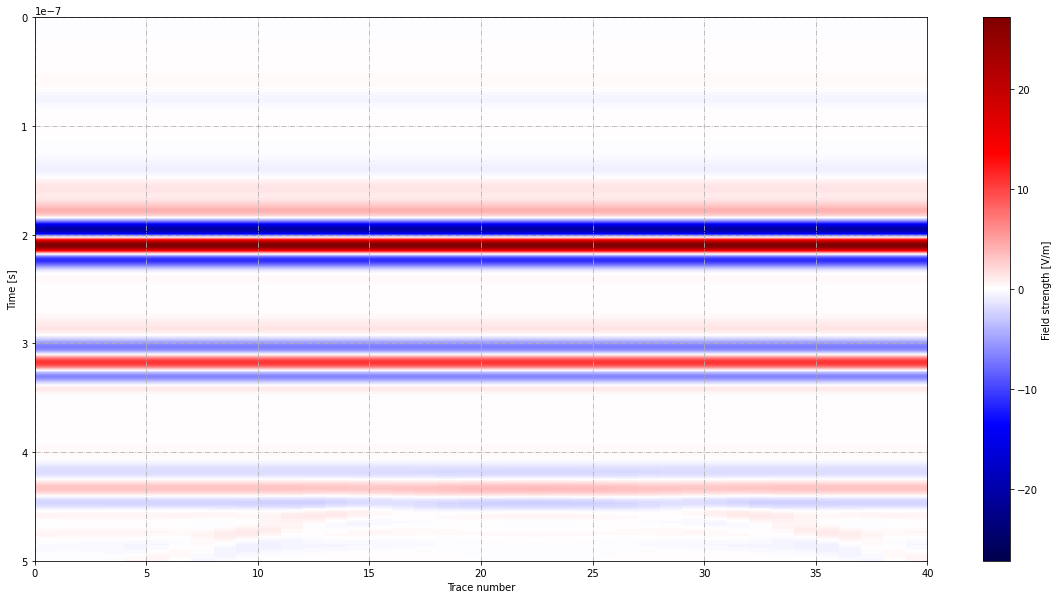

In [9]:
#%run -m gprMax ../../user_models/waterpocket_bed_snow_2D/waterpocket_bed_snow_2D.in -n 40
#%run -m tools.outputfiles_merge ../../user_models/waterpocket_bed_snow_2D/waterpocket_bed_snow_2D
%run -m tools.plot_Bscan ../../user_models/waterpocket_bed_snow_2D/waterpocket_bed_snow_2D_merged.out Ez